<a href="https://colab.research.google.com/github/DotBion/techgb2336-dataSciBiz/blob/main/Copy_of_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting MegaTelCo Churn

After discussing the churn problem at TelCo with Nadia for a while (remember her?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. __You have enough budget to give the retention offer to up to 25% of the customers whose contracts are expiring.__

It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. You have assembled the best historical data set you can at this point, which includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

In [2]:
#load important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



**1. Load the churn data [click here to download data](https://drive.google.com/uc?download&id=1xMMPIFOooEzcrdDFNFYvId5aROmTuzxv):**

**Use `get_dummies` to transform the categorical features into dummy features.**

In [3]:
url = "https://www.google.com/url?q=https%3A%2F%2Fdrive.google.com%2Fuc%3Fdownload%26id%3D1xMMPIFOooEzcrdDFNFYvId5aROmTuzxv"
df = pd.read_csv(url)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [ ]:
# prompt: create a heatmanp of all the columns=['gender', 'Partner', 'Dependents', 'PhoneService',
#                              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#                              'StreamingTV', 'StreamingMovies','PaperlessBilling'], features

# import matplotlib.pyplot as plt
# import seaborn as sns

# Assuming df is already loaded as in the provided code

# Select the specified columns
cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies','PaperlessBilling']

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of Selected Features')
plt.show()


KeyError: "None of [Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',\n       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',\n       'StreamingMovies', 'PaperlessBilling'],\n      dtype='object')] are in the [columns]"

<Figure size 1200x800 with 0 Axes>

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [6]:
# prompt: convert to numerical data

# import numpy as np
# import pandas as pd
# ... other imports

# Assuming df is already loaded as in the previous code
# Convert categorical features to numerical using get_dummies
df = pd.get_dummies(df,
                    columns=['gender', 'Partner', 'Dependents', 'PhoneService',
                             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                             'StreamingTV', 'StreamingMovies','PaperlessBilling'],
                    drop_first=True) # Drop the first dummy variable to avoid multicollinearity

# 'Churn' and 'SeniorCitizen' are already numerical (0/1 or Yes/No which is converted to 0/1)
#  'Tenure', and 'MonthlyCharges' are numerical already
print(df.head())


   SeniorCitizen  tenure     MultipleLines InternetService        Contract  \
0              0       1  No phone service             DSL  Month-to-month   
1              0      34                No             DSL        One year   
2              0       2                No             DSL  Month-to-month   
3              0      45  No phone service             DSL        One year   
4              0       2                No     Fiber optic  Month-to-month   

               PaymentMethod  MonthlyCharges Churn  gender_Male  Partner_Yes  \
0           Electronic check           29.85    No        False         True   
1               Mailed check           56.95    No         True        False   
2               Mailed check           53.85   Yes         True        False   
3  Bank transfer (automatic)           42.30    No         True        False   
4           Electronic check           70.70   Yes        False        False   

   ...  OnlineBackup_Yes  DeviceProtection_No inte

In [7]:
# prompt: convert the bool columns into 1 and 0

# Assuming df is already loaded and processed as in the previous code

# List of boolean columns to convert
bool_cols = ['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
             'OnlineSecurity_Yes',
             'OnlineBackup_Yes',
             'DeviceProtection_Yes',
             'TechSupport_Yes',
             'StreamingTV_Yes',
             'StreamingMovies_Yes',
             'PaperlessBilling_Yes']

# Convert boolean columns to 1 and 0
for col in bool_cols:
    df[col] = df[col].astype(int)

print(df.head())


   SeniorCitizen  tenure     MultipleLines InternetService        Contract  \
0              0       1  No phone service             DSL  Month-to-month   
1              0      34                No             DSL        One year   
2              0       2                No             DSL  Month-to-month   
3              0      45  No phone service             DSL        One year   
4              0       2                No     Fiber optic  Month-to-month   

               PaymentMethod  MonthlyCharges Churn  gender_Male  Partner_Yes  \
0           Electronic check           29.85    No            0            1   
1               Mailed check           56.95    No            1            0   
2               Mailed check           53.85   Yes            1            0   
3  Bank transfer (automatic)           42.30    No            1            0   
4           Electronic check           70.70   Yes            0            0   

   ...  OnlineBackup_Yes  DeviceProtection_No inte

In [8]:
# prompt: drop columns StreamingMovies_No internet service, StreamingTV_No internet service, TechSupport_No internet service, DeviceProtection_No internet service, OnlineBackup_No internet service, OnlineSecurity_No internet service

# Assuming df is already loaded and processed as in the previous code

columns_to_drop = ['StreamingMovies_No internet service',
                   'StreamingTV_No internet service',
                   'TechSupport_No internet service',
                   'DeviceProtection_No internet service',
                   'OnlineBackup_No internet service',
                   'OnlineSecurity_No internet service']

df = df.drop(columns=columns_to_drop, errors='ignore')

print(df.head())


   SeniorCitizen  tenure     MultipleLines InternetService        Contract  \
0              0       1  No phone service             DSL  Month-to-month   
1              0      34                No             DSL        One year   
2              0       2                No             DSL  Month-to-month   
3              0      45  No phone service             DSL        One year   
4              0       2                No     Fiber optic  Month-to-month   

               PaymentMethod  MonthlyCharges Churn  gender_Male  Partner_Yes  \
0           Electronic check           29.85    No            0            1   
1               Mailed check           56.95    No            1            0   
2               Mailed check           53.85   Yes            1            0   
3  Bank transfer (automatic)           42.30    No            1            0   
4           Electronic check           70.70   Yes            0            0   

   Dependents_Yes  PhoneService_Yes  OnlineSecurit

In [9]:
# prompt: map the values true false to 0 and 1

#import pandas as pd

# Assuming df is already loaded and processed as in the previous code

# Map 'Churn' values: 'Yes' to 1, 'No' to 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(df.head())


   SeniorCitizen  tenure     MultipleLines InternetService        Contract  \
0              0       1  No phone service             DSL  Month-to-month   
1              0      34                No             DSL        One year   
2              0       2                No             DSL  Month-to-month   
3              0      45  No phone service             DSL        One year   
4              0       2                No     Fiber optic  Month-to-month   

               PaymentMethod  MonthlyCharges  Churn  gender_Male  Partner_Yes  \
0           Electronic check           29.85      0            0            1   
1               Mailed check           56.95      0            1            0   
2               Mailed check           53.85      1            1            0   
3  Bank transfer (automatic)           42.30      0            1            0   
4           Electronic check           70.70      1            0            0   

   Dependents_Yes  PhoneService_Yes  OnlineS

In [10]:
df.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0,1,No phone service,DSL,Month-to-month,Electronic check,29.85,0,0,1,0,0,0,1,0,0,0,0,1
1,0,34,No,DSL,One year,Mailed check,56.95,0,1,0,0,1,1,0,1,0,0,0,0
2,0,2,No,DSL,Month-to-month,Mailed check,53.85,1,1,0,0,1,1,1,0,0,0,0,1
3,0,45,No phone service,DSL,One year,Bank transfer (automatic),42.30,0,1,0,0,0,1,0,1,1,0,0,0
4,0,2,No,Fiber optic,Month-to-month,Electronic check,70.70,1,0,0,0,1,0,0,0,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         7032 non-null   int64  
 1   tenure                7032 non-null   int64  
 2   MultipleLines         7032 non-null   object 
 3   InternetService       7032 non-null   object 
 4   Contract              7032 non-null   object 
 5   PaymentMethod         7032 non-null   object 
 6   MonthlyCharges        7032 non-null   float64
 7   Churn                 7032 non-null   int64  
 8   gender_Male           7032 non-null   int64  
 9   Partner_Yes           7032 non-null   int64  
 10  Dependents_Yes        7032 non-null   int64  
 11  PhoneService_Yes      7032 non-null   int64  
 12  OnlineSecurity_Yes    7032 non-null   int64  
 13  OnlineBackup_Yes      7032 non-null   int64  
 14  DeviceProtection_Yes  7032 non-null   int64  
 15  TechSupport_Yes      

In [12]:
# prompt: get the unique values for the columns with datatype object

# Assuming df is already loaded and processed as in the previous code

# Get columns with 'object' dtype
object_columns = df.select_dtypes(include='object').columns

# Iterate through the object columns and print unique values
for col in object_columns:
    print(f"Unique values for column '{col}': {df[col].unique()}")


Unique values for column 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values for column 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values for column 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values for column 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [13]:
# prompt: convert the above categorical columns into dummies

# Assuming df is already loaded and processed as in the previous code

# Get a list of categorical columns (excluding those already converted or not needed)
categorical_cols = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df.head())


   SeniorCitizen  tenure  MonthlyCharges  Churn  gender_Male  Partner_Yes  \
0              0       1           29.85      0            0            1   
1              0      34           56.95      0            1            0   
2              0       2           53.85      1            1            0   
3              0      45           42.30      0            1            0   
4              0       2           70.70      1            0            0   

   Dependents_Yes  PhoneService_Yes  OnlineSecurity_Yes  OnlineBackup_Yes  \
0               0                 0                   0                 1   
1               0                 1                   1                 0   
2               0                 1                   1                 1   
3               0                 0                   1                 0   
4               0                 1                   0                 0   

   ...  PaperlessBilling_Yes  MultipleLines_No phone service  \
0  ...    

__2. _Of course_ normally we would do some detailed exploratory work!  But we have high confidence in the data quality and there are no missing values, so lets proceed.__

__Define X and y and split your data into Training and Test using an 80/20 split (you may consider setting a `random_state` for reproducibility)__

In [14]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__3. Build the best model you can on the TRAINING set using a decision tree classifier.  We will do a grid search over the hyperparameters `max_depth` and `min_samples_leaf`.  Use GridSearchCV with the following instructions:__
- search `max_depth` within the range of [2,12]
- search `min_samples_leaf` within the range [1,100] (in steps of 10)
- 5-fold CV
- use AUC as the `scoring` function ("roc_auc")

**Report the optimal values of the parameters `min_samples_leaf` and the AUC associated with it. Define a model `tree_best` that uses your optimized value of min_samples_leaf and max_depth and fit it to the 80% training data.**

In [15]:
model_auc_scores = {}
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [21]:
### fit the model on the training set (use depth=2)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
depth=2
decision_tree = DecisionTreeClassifier(max_depth=depth, criterion="entropy")
decision_tree.fit(X_train, y_train)

### apply the model to the test set using .predict
y_pred = decision_tree.predict(X_test)

### find the accuracy using metrics.accuracy_score()
accuracy = metrics.accuracy_score(y_pred, y_test)
print("Accuracy:", round(accuracy,4))

Accuracy: 0.7342


In [ ]:
predictor_cols = X.columns

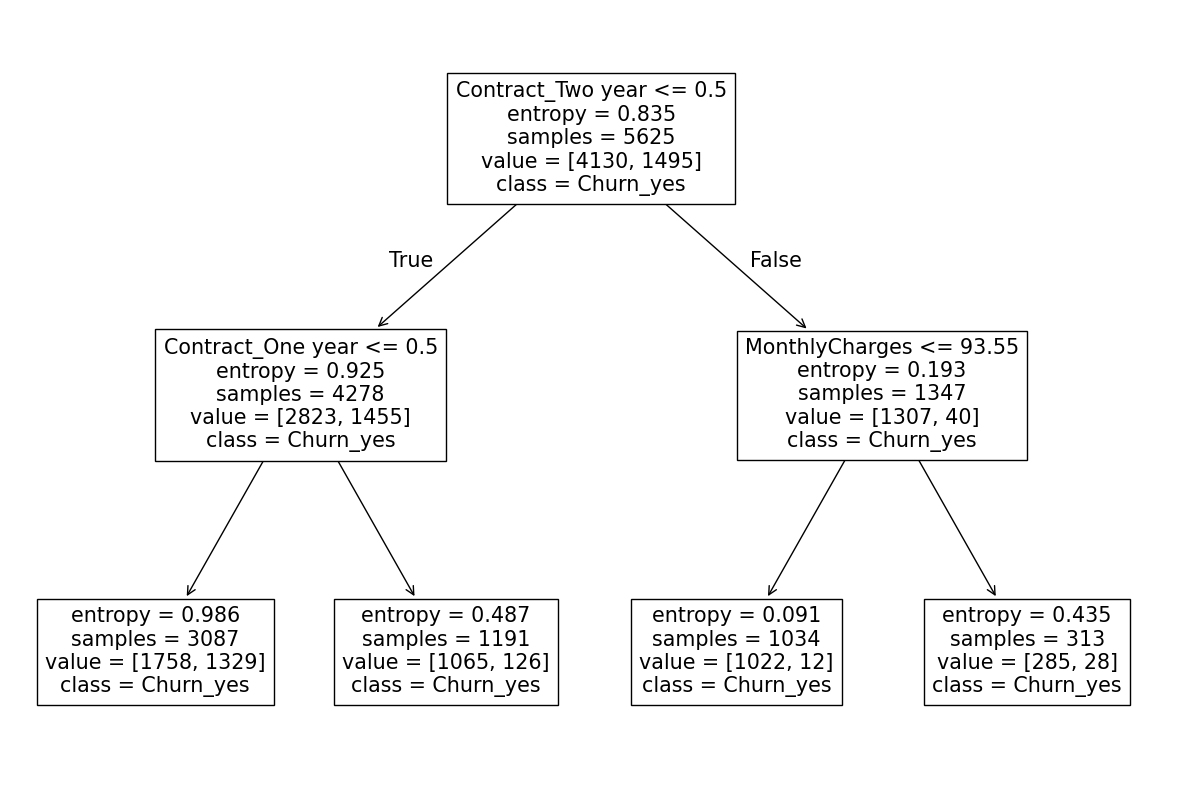

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(decision_tree, feature_names=predictor_cols, class_names=["Churn_yes", "Churn_no"])
plt.show()

**4. Calculate the feature importances.  For the top 5 most important features, explain whether you think they would be positively or negatively correlated with churn.**

**5.  Now fit Logistic Regression using Lasso regularization. Test the following values of the shrinkage hyperparameter C:  `C=[0.01,.1,1,10,100]`, and report on which value of C results in the highest AUC. Define a model `lr_best` that uses the best value of C.**


**6. Look at the regularized coefficient values in `lr_best`.  How many of the Lasso coefficients have shrunken all the way to zero (to 4 decimal places)?  What does this mean?**

**7.  Use your toolbox!! Now pick a third classification model of your choice. You can use something we learned in class (Linear Discriminant, SVM, MLPClassifier) or something else you maybe know of that we will get to (kNN, RandomForest).  Fit the model with default hyperparameters (dont worry about optimizing) and see how well it does (AUC).**


__8. Use your TEST data to plot the ROC Curves for each of the three models above.  You will need to use the predicted probabilities from each model applied to the TEST set and the `roc_curve()` function - make sure to plot the three curves together on the same plot. The plot should have a legend.  Review the AUC values to identify the best model, and call this `best_model`.__

__9. What is the cost / benefit matrix for implementing this model?  HINT: The cost is given in the problem description.  Remember that everyone who receives the offer takes it. The benefit comes when we make the offer to a customer whose actual Churn value is 1.  (i.e. they would have left us but we saved them).   We can assume each customer generates the same revenue - equal to the average of `MonthlyCharges`. Report the benefit as a YEARLY value.__

__10. Using `best_model` -  along with the cost/benefit matrix - now we want to look at profit.  Plot a *PROFIT CURVE* that shows the overall profit at different levels of marketing.  You'll need to sort the threshold probabilities, and calculate the profit at each threshold by determining who you market to and who you dont.  Use your cost/benefit numbers to calculate total profit at each threshold value. (You may want to refer back to the`T5_Model_assessment` notebook)__

**11. Recall that Nadia told you there is only budget to market to the top 25% of customers.  Make a pitch to her for altering that decision based on your Profit curve.  How much do you recommend marketing to, and how much money will it make compared to her threshold?**

__12. Assume Nadia was persuaded by your pitch and this model was deployed - and it performed as expected.  Now it is performance review season, and you are looking for a raise!!
Estimate the amount of money you made for the company by using your model.  Compare your profit above against a "dumb" model of marketing to the same amount of customers in the Test set who are selected randomly. (Hint: you can use a random number generator to pick customers at random to market to, and see what their profit would be).   Scale your results up to the overall consumer base of 100,000 customers to make your case.__

__13.  In the above exercise we assumed the benefit of each customer was the same.  But it would be even better to incorporate each customer's individual spending in the cost/benefit!! Calculate an *individualized expected value* for profit/loss for _each customer_ using their specific Monthly Charges and their calculated probability of churn.    Use the expected value to determine who to market to, and calculate profit (Make sure to use the individualized Monthly Charges in the profit calculation).  Are the results any better?__